### Anteater-Bugs's Optimization Model

In [5]:
import gurobipy as gp
from gurobipy import GRB

##### Create new model

In [ ]:
model = gp.Model('Anteater Bugs')

##### Create Decision variable

In [9]:
W = model.addVar(vtype = GRB.INTEGER, name = 'W')
L = model.addVar(vtype = GRB.INTEGER, name = 'L')

##### Set Objective

In [15]:
model.setObjective(W+2*L, GRB.MAXIMIZE)

##### Add Constraints

In [17]:
model.addConstr(10*W+3*L <= 1000, name = 'Malt_capa')
model.addConstr(20*W+12*L <= 2000, name = 'Hops_capa')
model.addConstr(3*W+3*L <= 1500, name = 'Labor_capa')
model.addConstr(W >= 0, name = 'Nonnegativity1')
model.addConstr(L >= 0, name = 'Nonnegativity2')

<gurobi.Constr *Awaiting Model Update*>

##### Optimize model

In [19]:
model.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 5 rows, 2 columns and 8 nonzeros
Model fingerprint: 0xaba28571
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+03]
Found heuristic solution: objective 100.0000000
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 2: 332 100 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.320000000000e+02, best bound 3.320000000000e+02, gap 0.0000%


##### Print result

In [21]:
print(f'Objective : {model.ObjVal}')
print(f'W: {W.X}')
print(f'L: {L.X}')

Objective : 332.0
W: -0.0
L: 166.0


### Large-scale Optimization Model

In [46]:
import random
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt

##### Create Data Function

In [51]:
def create_data(data_size):
    random.seed(42)

    p_j = [random.randint(1,100) for _ in range(data_size)]
    a_1_j = [random.randint(1,100) for _ in range(data_size)]
    a_2_j = [random.randint(1,100) for _ in range(data_size)]
    a_3_j = [random.randint(1,100) for _ in range(data_size)]

    return p_j, a_1_j, a_2_j, a_3_j

##### Gurobi Model Function

In [63]:
def gurobi_model(data_size, p_j, a_1_j, a_2_j, a_3_j, b1, b2, b3):
    model = gp.Model('Anteater Bugs')

    x = model.addVars(data_size, vtype=GRB.INTEGER, name = ' x')
    model.setObjective(gp.quicksum(p_j[j]*x[j] for j in range(data_size)), GRB.MAXIMIZE)

    model.addConstr(gp.quicksum(a_1_j[j]*x[j] for j in range(data_size)) <= b1, name = 'Malt_capa')
    model.addConstr(gp.quicksum(a_2_j[j]*x[j] for j in range(data_size)) <= b2, name = 'Hops_capa')
    model.addConstr(gp.quicksum(a_3_j[j]*x[j] for j in range(data_size)) <= b3, name = 'Labor_capa')

    for j in range(data_size):
        model.addConstr(x[j] >= 0, name = 'Nonnegativity')

    model.optimize()

    print('==================================================')
    print(f'Objective: {model.ObjVal}')

    return model.Runtime

##### Plot Runtime Graph Function

In [65]:
def plot_runtime_graph(runtime_dict):
    data_sizes = list(runtime_dict.keys())
    runtimes = list(runtime_dict.values())

    plt.figure(figsize=(10,6))
    plt.plot(data_sizes, runtimes, marker = 'o')

    for i in range(len(data_sizes)):
        plt.text(data_sizes[i], runtimes[i] + 0.003, '%.3f' %runtimes[i], ha = 'center')

    plt.title('Computation Time')
    plt.xlabel('Data Size')
    plt.ylabel('Runtime (seconds)')

    plt.xticks(data_sizes)

    plt.grid(True)
    plt.show()

##### Main Function

In [78]:
def main():
    data_sizes = [100, 500, 100, 5000, 10000]
    b1, b2, b3 = 1000, 2000, 1500
    runtime_dict = {}

    for data_size in data_sizes:
        p_j, a_1_j, a_2_j, a_3_j = create_data(data_size)
        gurobi_runtime = gurobi_model(data_size, p_j, a_1_j, a_2_j, a_3_j, b1, b2, b3)
        runtime_dict[data_size] = gurobi_runtime

    plot_runtime_graph(runtime_dict)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1260P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 103 rows, 100 columns and 400 nonzeros
Model fingerprint: 0xbeb635e7
Variable types: 0 continuous, 100 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 2e+03]
Found heuristic solution: objective 1260.0000000
Presolve removed 100 rows and 78 columns
Presolve time: 0.00s
Presolved: 3 rows, 22 columns, 66 nonzeros
Found heuristic solution: objective 1614.0000000
Variable types: 0 continuous, 22 integer (0 binary)
Found heuristic solution: objective 2621.0000000

Root relaxation: objective 1.514535e+04, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds     

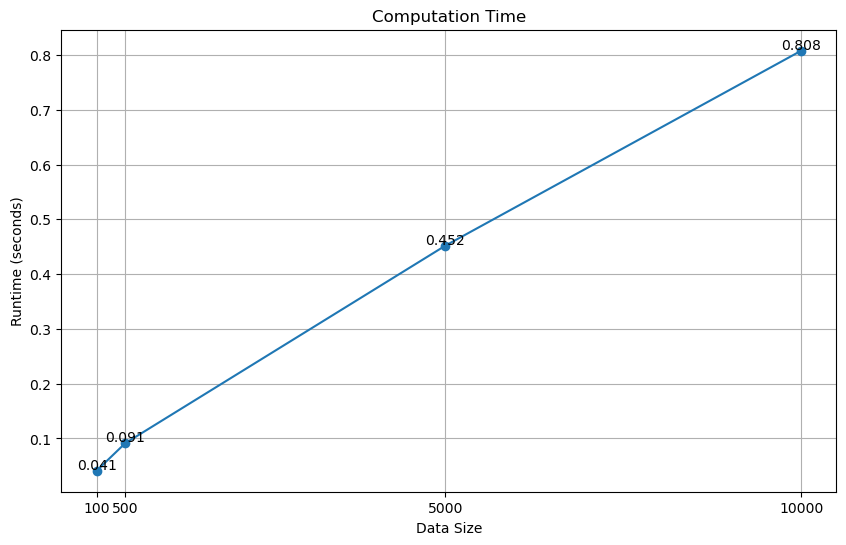

In [80]:
main()